In [1]:
import os, sys, glob
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from sklearn.metrics import precision_score, recall_score
from transformers import BertForSequenceClassification, BertTokenizerFast, BertJapaneseTokenizer, Trainer, TrainingArguments
from transformers import pipeline, Pipeline
from datasets import load_dataset, Dataset

pd.options.display.float_format = "{:.4f}".format

In [2]:
DATA_DIR = os.path.join(os.getcwd(), '..\\1_insight_summary\\data\\STARS_4月')

In [7]:
# voc_all_df = pd.read_csv(
#     os.path.join(DATA_DIR, 'data.csv'), encoding='cp932')

# print(voc_all_df.columns)

# voc_all_df = voc_all_df[['answer_question', 'store_name', 'buying_amount']]
# print(voc_all_df.shape)

# voc_all_df

In [3]:
import random

def return_value_based_on_probability():
    return True if random.random() < 0.3 else False

def return_random_between_zero_and_ten():
    return random.randint(0, 10)

def return_random_between_four_to_nine():
    return random.randint(4, 9)

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

c:\Users\000063JP6\Documents\15_案件\09_PPIH\技術検証②\nlp\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


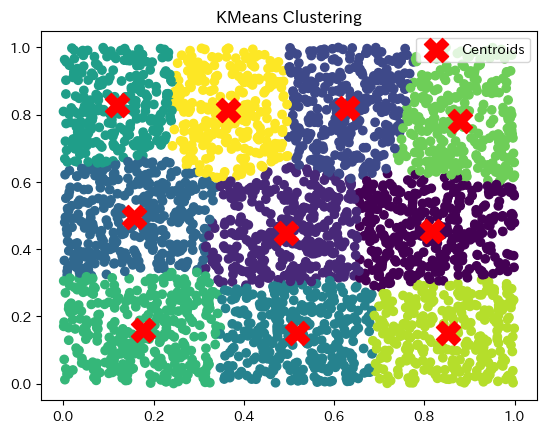

In [27]:
voc_data_df = pd.read_csv(
    os.path.join(DATA_DIR, 'scores_for_target_stores.csv'), encoding='utf-8')

voc_data_df = voc_data_df[['answer_question', 'store_name', 'buying_amount', 'sentiment_label', 'sentiment_score']]
voc_data_df['request'] = voc_data_df['sentiment_score'].apply(lambda x: return_value_based_on_probability())
# voc_data_df['cluster'] = voc_data_df['sentiment_score'].apply(lambda x: return_random_between_zero_and_ten())
voc_data_df['x'] = voc_data_df['sentiment_score'].apply(lambda x: np.random.random())
voc_data_df['y'] = voc_data_df['sentiment_score'].apply(lambda x: np.random.random())

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
predicted_labels = kmeans.fit_predict(voc_data_df[['x', 'y']])


plt.scatter(voc_data_df['x'], voc_data_df['y'], c=predicted_labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

voc_data_df['cluster'] = predicted_labels

In [40]:
pd.DataFrame([kmeans.cluster_centers_[:, 0],
kmeans.cluster_centers_[:, 1],]).T.reset_index().rename({'index': 'cluster_name', 0: 'x', 1:'y'}, axis=1).to_csv('cluster_info.csv', index=False)

In [4]:
voc_data_df = pd.read_csv('voc_data+[score, request, cluster].csv')

In [7]:
voc_data_df['month'] =  voc_data_df['sentiment_score'].apply(lambda x: return_random_between_four_to_nine())
voc_data_df['x'] =  voc_data_df['sentiment_score'].apply(lambda x: return_random_between_four_to_nine())
voc_data_df['y'] =  voc_data_df['sentiment_score'].apply(lambda x: return_random_between_four_to_nine())
voc_data_df['sentiment_label'] =  "Null"
voc_data_df['request'] =  "Null"

In [8]:
voc_data_df.to_csv('voc_data+[score, request, cluster].csv', index=False)

In [32]:
category_items = pd.read_excel('評価項目.xlsx')[['評価分類', '評価項目']]

In [33]:
category_items.rename({'評価項目':'category-II', '評価分類':'category-I'}, axis=1, inplace=True)

In [39]:
voc_data_df = pd.read_csv('./voc_data+[score, request, cluster].csv')
voc_data_df.sentiment_label = voc_data_df.sentiment_score.apply(lambda x: 'positive' if x > 0.75 else 'nevative ' if x <= 0.25 else 'neutral')
voc_data_df.request = voc_data_df['sentiment_score'].apply(lambda x: return_value_based_on_probability())
voc_data_df['category-II'] = voc_data_df['answer_question'].apply(lambda x: np.random.choice(category_items['category-II']))

In [40]:
voc_data_df.shape``

(1325, 15)

In [42]:
voc_data_df = pd.merge(left=voc_data_df, right=category_items, on='category-II', how='left')

voc_data_df.to_csv('voc_data+[score, request, cluster, category].csv', index=False)